# Task 3

# Canny Edge Detection and Hough Transform

In [2]:
# Importing necessary libraries
import skimage
from skimage.color import rgb2gray

import scipy
import scipy.signal

from matplotlib import pyplot as plt

import numpy as np
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

import cv2

In [3]:
img = skimage.io.imread('Data 06 30213/Bhamimage.jpeg')

In [203]:
# Function 2

def display_single(image, title=None, is_gray=True):

    plt.imshow(image, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

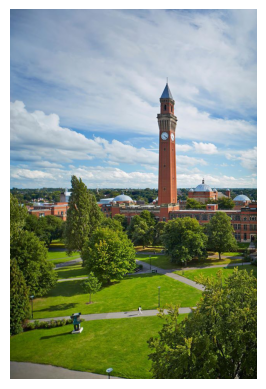

In [204]:
display_single(img)

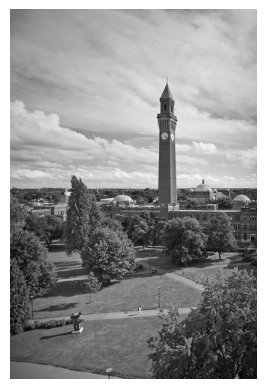

In [205]:
grayscale = rgb2gray(img)
display_single(grayscale)

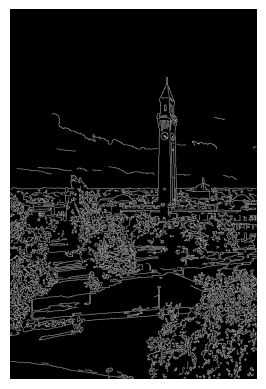

In [212]:
l_t = 0.2
canny_img = canny(grayscale, sigma=1, low_threshold=l_t, high_threshold=2*l_t)
display_single(canny_img)

In [213]:
angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(canny_img, theta=angles)

In [ ]:
accum, angles, dists = hough_line_peaks(h, theta, d, threshold=1, num_peaks=6)

In [ ]:
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

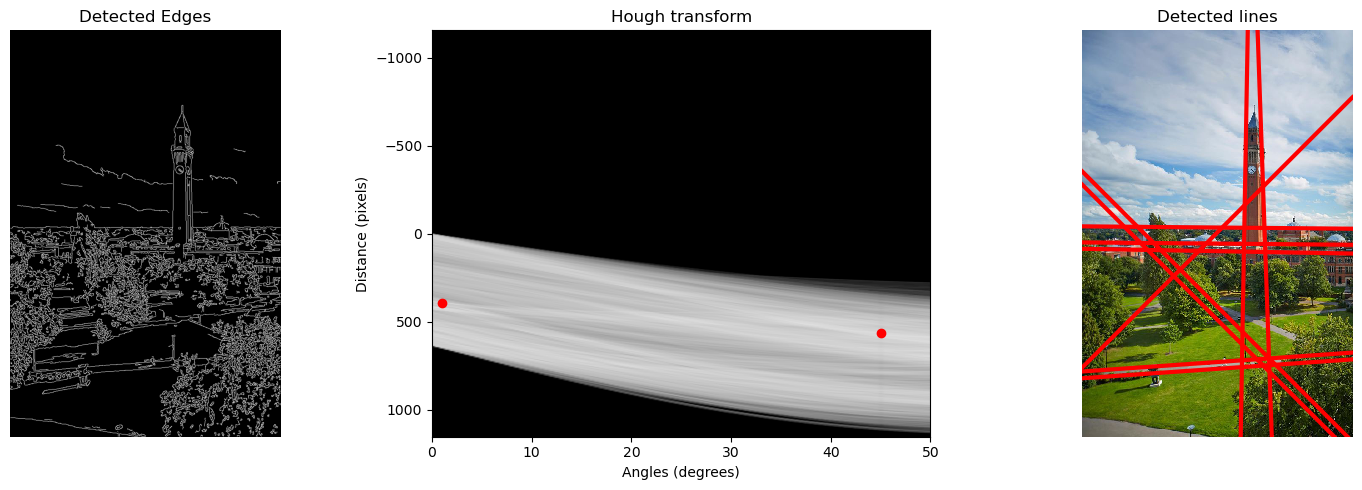

In [ ]:
# Configure the figure
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(canny_img, cmap='gray')
ax[0].set_title('Detected Edges')
ax[0].set_axis_off()

for i in range(0, len(angles)):
    ax[1].plot(np.rad2deg(angles[i]), dists[i], 'ro')

ax[1].imshow(np.log(1 + h), extent=bounds, cmap='gray', aspect=0.1)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')

ax[1].axis('auto')
ax[1].set_xlim(0, 50)

# Plot Figure 3: Detected Lines
for i in range(0, len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0), slope=np.tan(
        angles[i] + np.pi/2), color="red", linewidth=3)

ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

skimage.io.imshow(img)
plt.show()

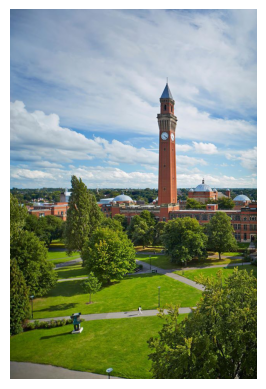

In [233]:
display_single(img)